In [93]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from typing import Any, Dict, List, Set

### Load and Preprocess Data

In [94]:
DATA_DIR: str = '/home/cc/genscale-staging/metrics/dnaseq'
!ls $DATA_DIR

burrows-wheeler-aligner.metrics.csv
burrows-wheeler-aligner.metrics.txt
fastq-cleaner-1500-srr062641-1and2.metrics.csv
fastq-cleaner-1500-srr062641-1and2.metrics.txt
fastqc-1500-srr062641-1.metrics.csv
fastqc-1500-srr062641-1.metrics.txt
fastqc-1500-srr062641-2.metrics.csv
fastqc-1500-srr062641-2.metrics.txt
gatk-apply-bqsr.metrics.csv
gatk-apply-bqsr.metrics.txt
gatk-base-recalibrator.metrics.csv
gatk-base-recalibrator.metrics.txt
picard-collect-wgs-metrics.metrics.csv
picard-collect-wgs-metrics.metrics.txt
picard-markduplicate.metrics.csv
picard-markduplicate.metrics.txt
picard-validate-sam.metrics.csv
picard-validate-sam.metrics.txt
samtools-index-markduplicate.metrics.csv
samtools-index-markduplicate.metrics.txt
samtools-sort-markduplicate.metrics.csv
samtools-sort-markduplicate.metrics.txt


In [95]:
fastqc: pd.DataFrame = pd.read_csv(f'{DATA_DIR}/fastqc-1500-srr062641-2.metrics.csv') 
fastq: pd.DataFrame = pd.read_csv(f'{DATA_DIR}/fastq-cleaner-1500-srr062641-1and2.metrics.csv')
bwa: pd.DataFrame = pd.read_csv(f'{DATA_DIR}/burrows-wheeler-aligner.metrics.csv')
picard_markduplicate: pd.DataFrame = pd.read_csv(f'{DATA_DIR}/picard-markduplicate.metrics.csv')
samtools_sort_markdup: pd.DataFrame = pd.read_csv(f'{DATA_DIR}/samtools-sort-markduplicate.metrics.csv')
samtools_index_markdup: pd.DataFrame = pd.read_csv(f'{DATA_DIR}/samtools-index-markduplicate.metrics.csv')
gatk_baserecal: pd.DataFrame = pd.read_csv(f'{DATA_DIR}/gatk-base-recalibrator.metrics.csv')
gatk_applybqsr: pd.DataFrame = pd.read_csv(f'{DATA_DIR}/gatk-apply-bqsr.metrics.csv')
picard_validatesam: pd.DataFrame = pd.read_csv(f'{DATA_DIR}/picard-validate-sam.metrics.csv')
picard_collectwgs: pd.DataFrame = pd.read_csv(f'{DATA_DIR}/picard-collect-wgs-metrics.metrics.csv')

In [96]:
tools_d: Dict[str, pd.DataFrame] = {
    'fastqc': fastqc,
    'fastq': fastq,
    'bwa': bwa,
    'picard_markduplicate': picard_markduplicate,
    'samtools_sort_markdup': samtools_sort_markdup,
    'samtools_index_markdup': samtools_index_markdup,
    'gatk_baserecal': gatk_baserecal,
    'gatk_applybqsr': gatk_applybqsr,
    'picard_validatesam': picard_validatesam,
    'picard_collectwgs': picard_collectwgs,
}
cpu_cols: List[str] = [f'cpu{i}' for i in range(96)]

In [97]:
for name, t in tools_d.items():
    offset: float = t.iloc[0,0]
    t['%CPU'] = t[cpu_cols].sum(axis=1)
    t['Uptime'] = t['time'] - offset
    t['rss_gb'] = t['rss'] / 1e6

# Per-Application CPU Utilization

## BWA

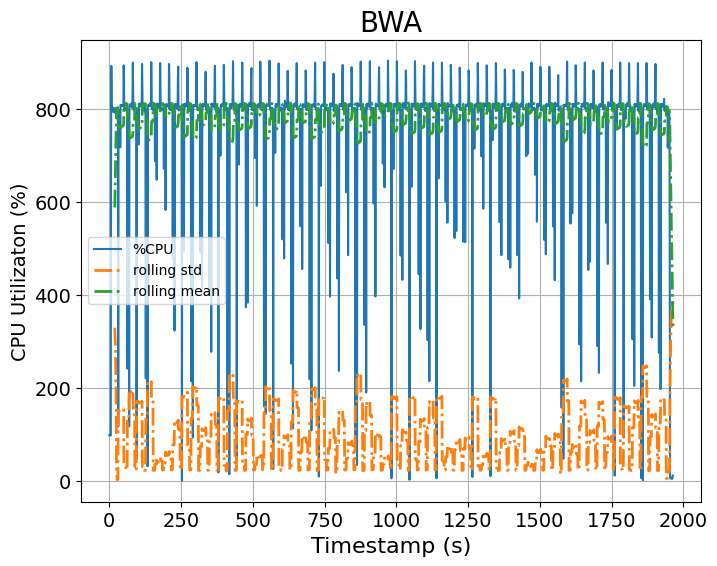

In [98]:
TITLE_FONTSIZE: int = 20
MED_FONTSIZE: int = 16
SMALL_FONTSIZE: int = 14
ax = bwa.plot(x='Uptime', y='%CPU', 
                        label='%CPU', color='tab:blue', figsize=(8,6))

bwa['%CPU'].rolling(20).std().plot(ax=ax, color='tab:orange', linewidth=2,
                                   label='rolling std', linestyle='-.')
bwa['%CPU'].rolling(20).mean().plot(ax=ax, color='tab:green', linewidth=2,
                                   label='rolling mean', linestyle='-.')


ax.set_title('BWA', fontsize=TITLE_FONTSIZE)
ax.grid(True)
ax.set_ylabel('CPU Utilizaton (%)', fontsize=SMALL_FONTSIZE)
ax.set_xlabel('Timestamp (s)', fontsize=MED_FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=SMALL_FONTSIZE)
ax.tick_params(axis='both', which='minor', labelsize=SMALL_FONTSIZE)
# ax.set_xlim(0, 1600)
# ax.set_xlim(0, 400)
ax.legend()

## Fastq Cleaner

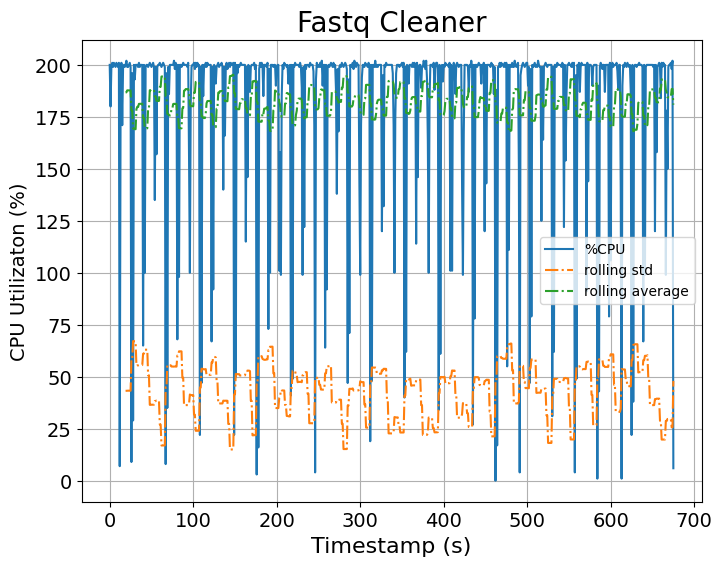

In [99]:
TITLE_FONTSIZE: int = 20
MED_FONTSIZE: int = 16
SMALL_FONTSIZE: int = 14
ax = fastq.plot(x='Uptime', y='%CPU', 
                        label='%CPU', color='tab:blue', figsize=(8,6))

fastq['%CPU'].rolling(20).std().plot(ax=ax, color='tab:orange', 
                                   label='rolling std', linestyle='-.')
fastq['%CPU'].rolling(20).mean().plot(ax=ax, color='tab:green', 
                                   label='rolling average', linestyle='-.')

ax.set_title('Fastq Cleaner', fontsize=TITLE_FONTSIZE)
ax.grid(True)
ax.set_ylabel('CPU Utilizaton (%)', fontsize=SMALL_FONTSIZE)
ax.set_xlabel('Timestamp (s)', fontsize=MED_FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=SMALL_FONTSIZE)
ax.tick_params(axis='both', which='minor', labelsize=SMALL_FONTSIZE)
# ax.set_xlim(0, 1600)
# ax.set_xlim(0, 400)
ax.legend()

## FastQC

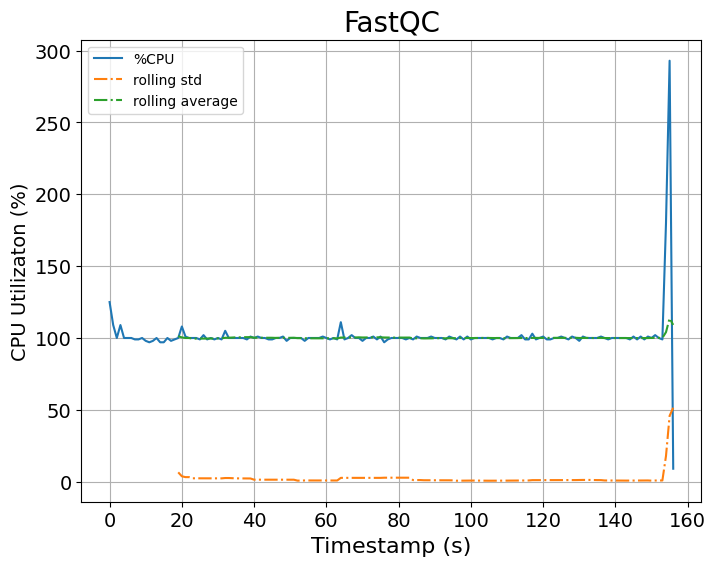

In [100]:
TITLE_FONTSIZE: int = 20
MED_FONTSIZE: int = 16
SMALL_FONTSIZE: int = 14
ax = fastqc.plot(x='Uptime', y='%CPU', 
                        label='%CPU', color='tab:blue', figsize=(8,6))

fastqc['%CPU'].rolling(20).std().plot(ax=ax, color='tab:orange', 
                                   label='rolling std', linestyle='-.')
fastqc['%CPU'].rolling(20).mean().plot(ax=ax, color='tab:green', 
                                   label='rolling average', linestyle='-.')

ax.set_title('FastQC', fontsize=TITLE_FONTSIZE)
ax.grid(True)
ax.set_ylabel('CPU Utilizaton (%)', fontsize=SMALL_FONTSIZE)
ax.set_xlabel('Timestamp (s)', fontsize=MED_FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=SMALL_FONTSIZE)
ax.tick_params(axis='both', which='minor', labelsize=SMALL_FONTSIZE)
# ax.set_xlim(0, 1600)
# ax.set_xlim(0, 400)
ax.legend()

## Picard ValidateSAM

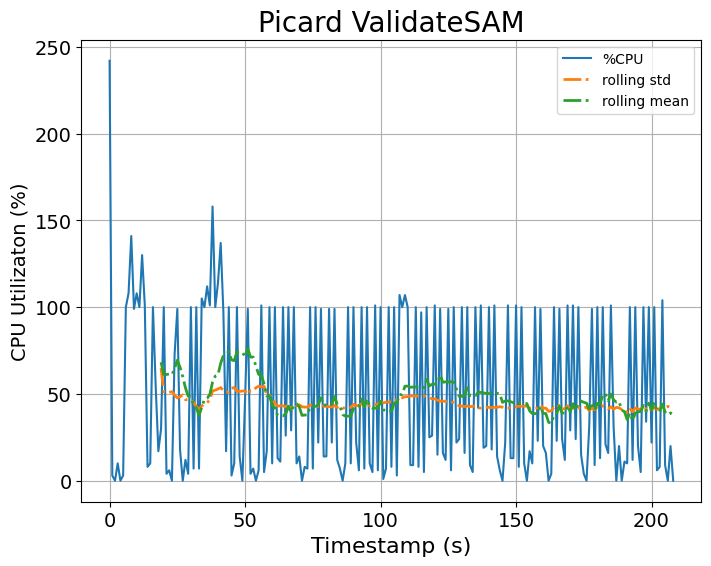

In [101]:
TITLE_FONTSIZE: int = 20
MED_FONTSIZE: int = 16
SMALL_FONTSIZE: int = 14
ax = picard_validatesam.plot(x='Uptime', y='%CPU', 
                        label='%CPU', color='tab:blue', figsize=(8,6))

picard_validatesam['%CPU'].rolling(20).std().plot(ax=ax, color='tab:orange', linewidth=2,
                                   label='rolling std', linestyle='-.')
picard_validatesam['%CPU'].rolling(20).mean().plot(ax=ax, color='tab:green', linewidth=2,
                                   label='rolling mean', linestyle='-.')


ax.set_title('Picard ValidateSAM', fontsize=TITLE_FONTSIZE)
ax.grid(True)
ax.set_ylabel('CPU Utilizaton (%)', fontsize=SMALL_FONTSIZE)
ax.set_xlabel('Timestamp (s)', fontsize=MED_FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=SMALL_FONTSIZE)
ax.tick_params(axis='both', which='minor', labelsize=SMALL_FONTSIZE)
# ax.set_xlim(0, 1600)
# ax.set_xlim(0, 400)
ax.legend()

## Picard Markduplicate

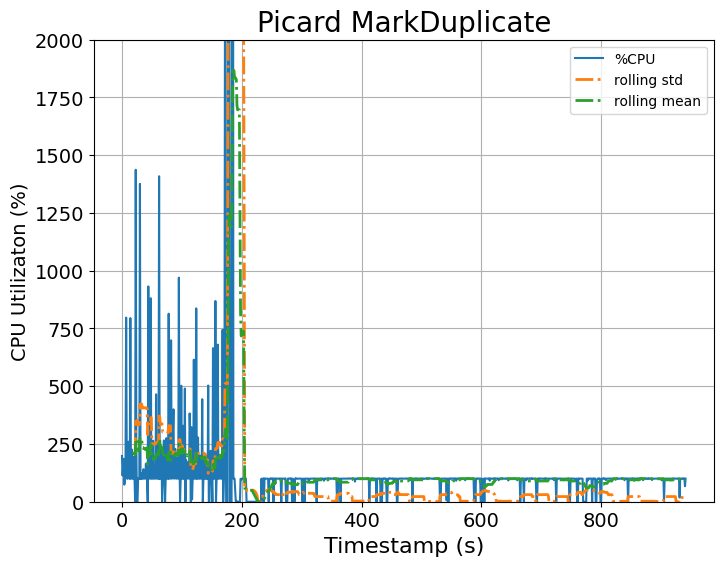

In [102]:
TITLE_FONTSIZE: int = 20
MED_FONTSIZE: int = 16
SMALL_FONTSIZE: int = 14
ax = picard_markduplicate.plot(x='Uptime', y='%CPU', 
                        label='%CPU', color='tab:blue', figsize=(8,6))

picard_markduplicate['%CPU'].rolling(20).std().plot(ax=ax, color='tab:orange', linewidth=2,
                                   label='rolling std', linestyle='-.')
picard_markduplicate['%CPU'].rolling(20).mean().plot(ax=ax, color='tab:green', linewidth=2,
                                   label='rolling mean', linestyle='-.')


ax.set_title('Picard MarkDuplicate', fontsize=TITLE_FONTSIZE)
ax.grid(True)
ax.set_ylabel('CPU Utilizaton (%)', fontsize=SMALL_FONTSIZE)
ax.set_xlabel('Timestamp (s)', fontsize=MED_FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=SMALL_FONTSIZE)
ax.tick_params(axis='both', which='minor', labelsize=SMALL_FONTSIZE)
ax.set_ylim(0, 2000)
# ax.set_xlim(0, 400)
ax.legend()

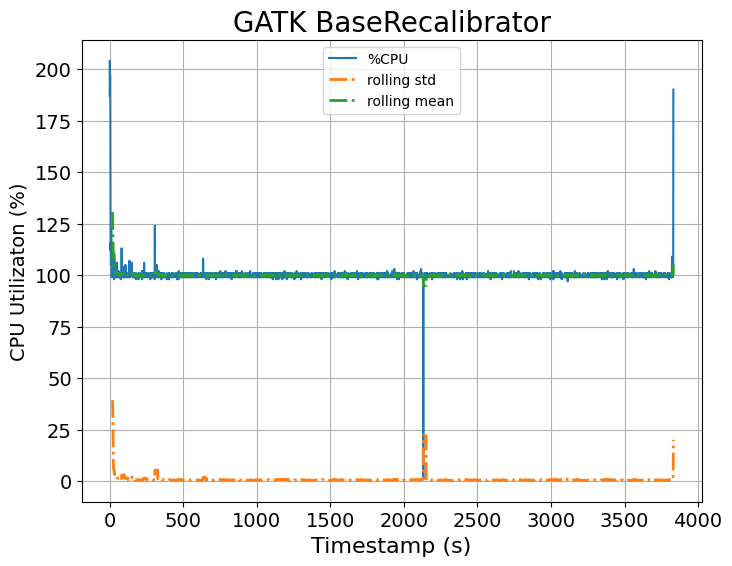

In [103]:
TITLE_FONTSIZE: int = 20
MED_FONTSIZE: int = 16
SMALL_FONTSIZE: int = 14
ax = gatk_baserecal.plot(x='Uptime', y='%CPU', 
                        label='%CPU', color='tab:blue', figsize=(8,6))
gatk_baserecal['%CPU'].rolling(20).std().plot(ax=ax, color='tab:orange', linewidth=2,
                                   label='rolling std', linestyle='-.')
gatk_baserecal['%CPU'].rolling(20).mean().plot(ax=ax, color='tab:green', linewidth=2,
                                   label='rolling mean', linestyle='-.')


ax.set_title('GATK BaseRecalibrator', fontsize=TITLE_FONTSIZE)
ax.grid(True)
ax.set_ylabel('CPU Utilizaton (%)', fontsize=SMALL_FONTSIZE)
ax.set_xlabel('Timestamp (s)', fontsize=MED_FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=SMALL_FONTSIZE)
ax.tick_params(axis='both', which='minor', labelsize=SMALL_FONTSIZE)
# ax.set_xlim(0, 1600)
# ax.set_xlim(0, 400)
ax.legend()

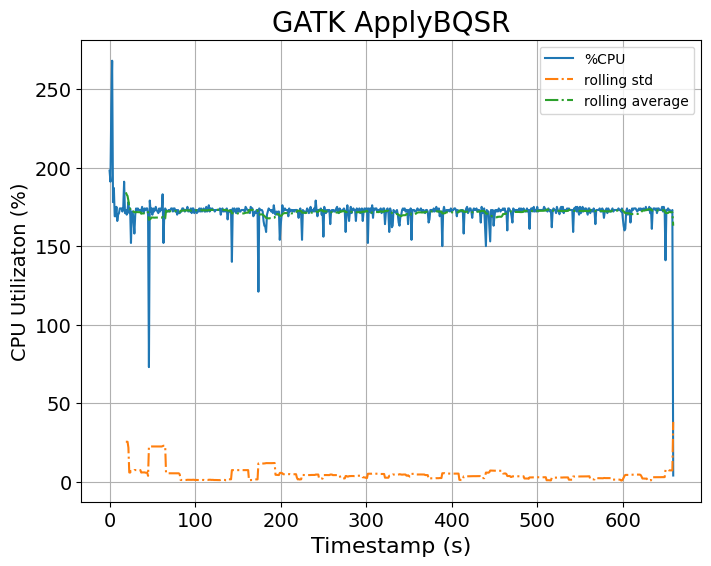

In [104]:
TITLE_FONTSIZE: int = 20
MED_FONTSIZE: int = 16
SMALL_FONTSIZE: int = 14
ax = gatk_applybqsr.plot(x='Uptime', y='%CPU', 
                        label='%CPU', color='tab:blue', figsize=(8,6))
ax.set_title('GATK ApplyBQSR', fontsize=TITLE_FONTSIZE)
gatk_applybqsr['%CPU'].rolling(20).std().plot(ax=ax, color='tab:orange', 
                                   label='rolling std', linestyle='-.')
gatk_applybqsr['%CPU'].rolling(20).mean().plot(ax=ax, color='tab:green', 
                                   label='rolling average', linestyle='-.')

ax.grid(True)
ax.set_ylabel('CPU Utilizaton (%)', fontsize=SMALL_FONTSIZE)
ax.set_xlabel('Timestamp (s)', fontsize=MED_FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=SMALL_FONTSIZE)
ax.tick_params(axis='both', which='minor', labelsize=SMALL_FONTSIZE)
# ax.set_xlim(0, 1600)
# ax.set_xlim(0, 400)
ax.legend()

## Picard CollectWGSmetrics

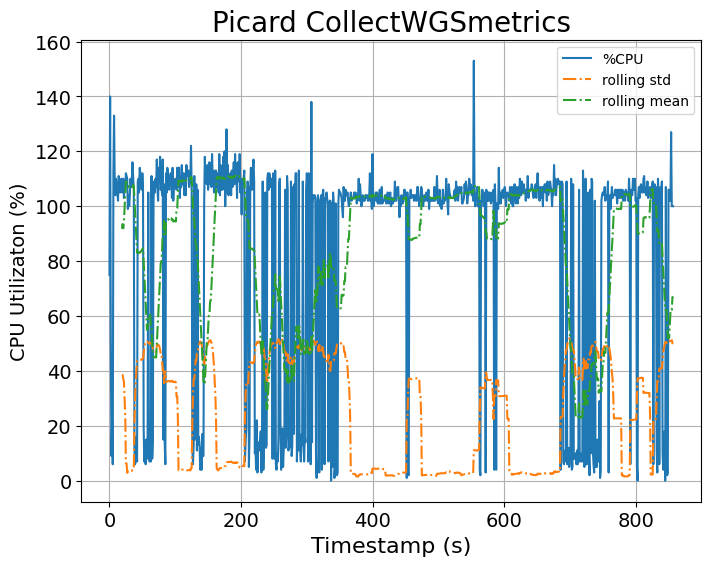

In [105]:
TITLE_FONTSIZE: int = 20
MED_FONTSIZE: int = 16
SMALL_FONTSIZE: int = 14
ax = picard_collectwgs.plot(x='Uptime', y='%CPU', 
                        label='%CPU', color='tab:blue', figsize=(8,6))
picard_collectwgs['%CPU'].rolling(20).std().plot(ax=ax, color='tab:orange', 
                                   label='rolling std', linestyle='-.')
picard_collectwgs['%CPU'].rolling(20).mean().plot(ax=ax, color='tab:green', 
                                   label='rolling mean', linestyle='-.')
ax.set_title('Picard CollectWGSmetrics', fontsize=TITLE_FONTSIZE)
ax.grid(True)
ax.set_ylabel('CPU Utilizaton (%)', fontsize=SMALL_FONTSIZE)
ax.set_xlabel('Timestamp (s)', fontsize=MED_FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=SMALL_FONTSIZE)
ax.tick_params(axis='both', which='minor', labelsize=SMALL_FONTSIZE)
# ax.set_xlim(0, 200)
# ax.set_xlim(0, 400)
ax.legend()

## SAMtools Sort

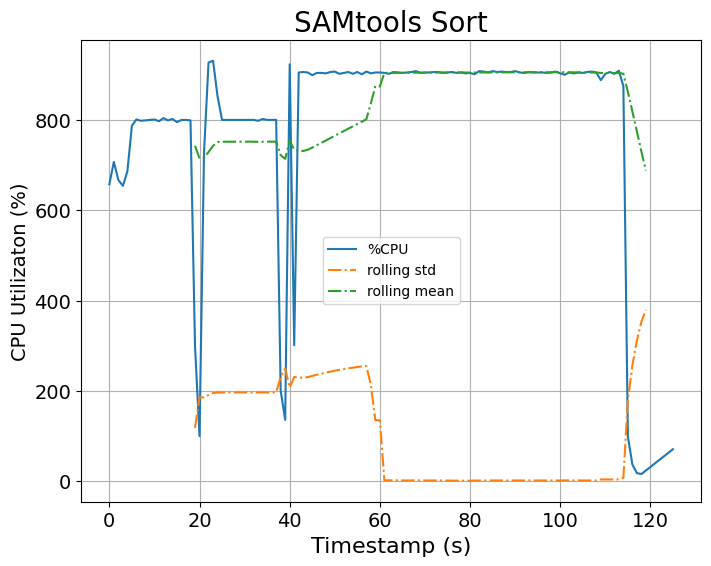

In [106]:
TITLE_FONTSIZE: int = 20
MED_FONTSIZE: int = 16
SMALL_FONTSIZE: int = 14
ax = samtools_sort_markdup.plot(x='Uptime', y='%CPU', 
                        label='%CPU', color='tab:blue', figsize=(8,6))
samtools_sort_markdup['%CPU'].rolling(20).std().plot(ax=ax, color='tab:orange', 
                                   label='rolling std', linestyle='-.')
samtools_sort_markdup['%CPU'].rolling(20).mean().plot(ax=ax, color='tab:green', 
                                   label='rolling mean', linestyle='-.')
ax.set_title('SAMtools Sort', fontsize=TITLE_FONTSIZE)
ax.grid(True)
ax.set_ylabel('CPU Utilizaton (%)', fontsize=SMALL_FONTSIZE)
ax.set_xlabel('Timestamp (s)', fontsize=MED_FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=SMALL_FONTSIZE)
ax.tick_params(axis='both', which='minor', labelsize=SMALL_FONTSIZE)
# ax.set_xlim(0, 200)
# ax.set_xlim(0, 400)
ax.legend()

In [107]:
avg_bwa: float = np.mean(bwa['%CPU'])
avg_validatesam: float = np.mean(picard_validatesam['%CPU'])
avg_gatk_baserecal: float = np.mean(gatk_baserecal['%CPU'])
avg_gatk_applybqsr: float = np.mean(gatk_applybqsr['%CPU'])
avg_fastq_cleaner: float = np.mean(fastq['%CPU'])
avg_picard_markduplicate: float = np.mean(picard_markduplicate['%CPU'])
avg_picard_collectwgs: float = np.mean(picard_collectwgs['%CPU'])
avg_samtools_sort: float = np.mean(samtools_sort_markdup['%CPU'])
avg_samtools_index: float = np.mean(samtools_index_markdup['%CPU'])

print(f'Avg. Picard Validatesam: {avg_bwa}')
print(f'Avg. Picard Validatesam: {avg_validatesam}')
print(f'Avg. GATK BaseRecalibrator: {avg_gatk_baserecal}')
print(f'Avg. GATK ApplyBQSR: {avg_gatk_applybqsr}')
print(f'Avg. Fastq Cleaner: {avg_fastq_cleaner}')
print(f'Avg. Picard Markduplicate: {avg_picard_markduplicate}')
print(f'Avg. Picard CollectWGS: {avg_picard_collectwgs}')
print(f'Avg. Samtools Sort: {avg_samtools_sort}')
print(f'Avg. Samtools Index: {avg_samtools_index}')

Avg. Picard Validatesam: 773.8961475826972
Avg. Picard Validatesam: 48.78928229665071
Avg. GATK BaseRecalibrator: 100.12396295330029
Avg. GATK ApplyBQSR: 171.6828484848485
Avg. Fastq Cleaner: 182.00007396449703
Avg. Picard Markduplicate: 145.3024946921444
Avg. Picard CollectWGS: 85.21902097902098
Avg. Samtools Sort: 804.9786666666666
Avg. Samtools Index: 932.8333333333334


In [108]:
std_bwa: float = np.std(bwa['%CPU'])
std_validatesam: float = np.std(picard_validatesam['%CPU'])
std_gatk_baserecal: float = np.std(gatk_baserecal['%CPU'])
std_gatk_applybqsr: float = np.std(gatk_applybqsr['%CPU'])
std_fastq_cleaner: float = np.std(fastq['%CPU'])
std_picard_markduplicate: float = np.std(picard_markduplicate['%CPU'])
std_picard_collectwgs: float = np.std(picard_collectwgs['%CPU'])
std_samtools_sort: float = np.std(samtools_sort_markdup['%CPU'])
std_samtools_index: float = np.std(samtools_index_markdup['%CPU'])

print(f'Std. BWA: {std_bwa}')
print(f'Std. Picard Validatesam: {std_validatesam}')
print(f'Std. GATK BaseRecalibrator: {std_gatk_baserecal}')
print(f'Std. GATK ApplyBQSR: {std_gatk_applybqsr}')
print(f'Std. Fastq Cleaner: {std_fastq_cleaner}')
print(f'Std. Picard Markduplicate: {std_picard_markduplicate}')
print(f'Std. Picard CollectWGS: {std_picard_collectwgs}')
print(f'Std. Samtools Sort: {std_samtools_sort}')
print(f'Std. Samtools Index: {std_samtools_index}')

Std. BWA: 137.5730493806719
Std. Picard Validatesam: 46.98316514095166
Std. GATK BaseRecalibrator: 4.24914292251768
Std. GATK ApplyBQSR: 10.04754215722858
Std. Fastq Cleaner: 45.067857143198374
Std. Picard Markduplicate: 532.8819414458967
Std. Picard CollectWGS: 40.072856821295794
Std. Samtools Sort: 215.04474144905026
Std. Samtools Index: 6.718548123582125
